## Arundine

* Arundine, or 3,3-Diindolylmethane, is a natural compound formed in the stomach from its precursor Indol-3-carbinol in Brassicacea [Diindolylmethane (DIM) Information Resource Center, U Cali Berkeley](https://www.diindolylmethane-dim.com/), [Biersack 2020](https://www.cdrjournal.com/article/view/3692)
* neuroprotective action and BBB-permeability:
    * the MPTPp in-vivo mouse model of Parkinson's disease (para-phenyl–substituted diindolylmethane (C-DIM), [De Miranda et al 2013](https://jpet.aspetjournals.org/content/345/1/125), [De Miranda et al 2015](https://academic.oup.com/toxsci/article/143/2/360/1676838))
    * oxidative stress induced apoptosis in hippocampal neuronal cells ([Lee et al 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7023184/))
    * primary hippocampal cell cultures exposed to ischemia ([Rzemieniec et al 2019](https://link.springer.com/article/10.1007/s10495-019-01522-2))
* antiinflammatory in fibroblasts from rheumatoid arthritis patients ([Du et al 2019](https://www.frontiersin.org/articles/10.3389/fimmu.2019.01620/full))
* targets in our drug-target network
    * [RGS4](https://www.genecards.org/cgi-bin/carddisp.pl?gene=RGS4): Regulator Of G Protein Signaling 4. Inhibits signal transduction by increasing the GTPase activity of G protein alpha subunits thereby driving them into their inactive GDP-bound form.
    * [GPR84](https://www.genecards.org/cgi-bin/carddisp.pl?gene=GPR84): G-Protein Coupled Receptor 84.  Receptor for medium-chain free fatty acid (FFA) with carbon chain lengths of C9 to C14. Capric acid (C10:0), undecanoic acid (C11:0) and lauric acid (C12:0) are the most potent agonists. Not activated by short-chain and long-chain saturated and unsaturated FFAs. Activation by medium-chain free fatty acid is coupled to a pertussis toxin sensitive G(i/o) protein pathway. May have important roles in processes from fatty acid metabolism to regulation of the immune system.
* other targets
    * [AHR](https://www.genecards.org/cgi-bin/carddisp.pl?gene=AHR): aryl hydrocarbon receptor: selective aryl hydrocarbon receptor modulator.  Ligand-activated transcription factor that enables cells to adapt to changing conditions by sensing compounds from the environment, diet, microbiome and cellular metabolism, and which plays important roles in development, immunity and cancer (PubMed:30373764, 23275542, 7961644, 32818467). ChEMBL evidence from mouse (Kd 90 nM) and human (missing activity data) studies
* multiple suggested molecular mechanisms relevant to Alzheimer's disease
    * inhibits AHR and histone deacylase dependent apoptosis and autophagy (neuroprotective effect [Rzemieniec et al 2019](https://link.springer.com/article/10.1007/s10495-019-01522-2))
    * activates TrkB/Akt signal pathway and thus promotes BDNF and antioxidant enzyme formation (neuroprotective effect [Lee et al 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7023184/))
    * inhibits MAPK and AKT/mTOR pathway an prevents TNF-alfa induced proinflammatory factors ([Du et al 2019](https://www.frontiersin.org/articles/10.3389/fimmu.2019.01620/full))
* clinical trials ([ChEMBL](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL446452/))
    * cervical cancer (phase 3)
    * breast cancer (phase 2)
    * prostate adenocarcinoma (phase 1)
* other indications
    * gastrointestinal cancer ([Kim 2016](https://www.mdpi.com/1422-0067/17/7/1155))

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from toolbox import wrappers
from toolbox import network_utilities
import pandas as pd
import numpy as np
import itertools
import functools
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import os.path
import attila_utils
import repos_tools

GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!


Gene-gene network

In [2]:
network_cheng = wrappers.get_network('../../resources/PPI/Cheng2019/network.sif', only_lcc = True)
ggn = network_cheng # gene-gene network

ID converters from Entrez

In [3]:
fpath = '../../resources/hgnc/hgnc_complete_set.txt'
hgnc = pd.read_csv(fpath, sep='\t', usecols=['uniprot_ids', 'symbol', 'entrez_id'], dtype={'entrez_id': str}).dropna()
uniprot2ids = hgnc.set_index('uniprot_ids')
symbol2ids = hgnc.set_index('symbol')
entrez2ids = hgnc.set_index('entrez_id')

Gene sets

In [4]:
def convert_filter(l, x2ids=symbol2ids, convert=True, remove_not_in_ggn=True):
    def extracter(u):
        try:
            val = x2ids.loc[u, 'entrez_id']
        except KeyError:
            val = None
        return(val)
    val = [extracter(u) if convert else u for u in l
           if (not remove_not_in_ggn) or (extracter(u) in ggn.nodes)]
    return(val)

def read_gset(name='knowledge', convert=True, fpath='../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.xlsx'):
    l = pd.read_excel(fpath, sheet_name=name, header=None).iloc[:, 0].to_list()
    l = convert_filter(l, x2ids=symbol2ids, convert=convert, remove_not_in_ggn=True)
    return(l)

In [5]:
gset_names = ['knowledge', 'TWAS2+', 'agora2+', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4', 'APOE3-4 DE neuron', 'APOE3-4 DE astrocyte', 'APOE3-4 DE microglia']
gsets = pd.DataFrame({k: [read_gset(gs, convert=v) for gs in gset_names] for k, v in {'symbol': False, 'entrez_id': True}.items()}, index=gset_names)
gsets['combined'] = gsets.apply(lambda s: dict(zip(s.symbol, s.entrez_id)), axis=1)
gsets

,symbol,entrez_id,combined
knowledge,"[A2M, ABCA7, ADAM10, APCS, APOE, APP, CLU, CST...","[2, 10347, 102, 325, 348, 351, 1191, 1471, 150...","{'A2M': '2', 'ABCA7': '10347', 'ADAM10': '102'..."
TWAS2+,"[ABCA7, ACE, APOC1, APOC2, APOC4, APOE, BCAM, ...","[10347, 1636, 341, 344, 346, 348, 4059, 602, 2...","{'ABCA7': '10347', 'ACE': '1636', 'APOC1': '34..."
agora2+,"[ACE, AP2B1, ATP1B1, ATP2A2, ATP2B1, ATP6V1A, ...","[1636, 163, 481, 488, 490, 523, 274, 1192, 119...","{'ACE': '1636', 'AP2B1': '163', 'ATP1B1': '481..."
AD DE APOE3-APOE3,"[AAK1, ADD3, AEBP1, AGO2, AK5, AKAP11, ALKBH5,...","[22848, 120, 165, 27161, 26289, 11215, 54890, ...","{'AAK1': '22848', 'ADD3': '120', 'AEBP1': '165..."
AD DE APOE4-APOE4,"[ABCC12, ACER3, ACOT7, ADCYAP1, ADD3, AGO2, AG...","[94160, 55331, 11332, 116, 120, 27161, 57085, ...","{'ABCC12': '94160', 'ACER3': '55331', 'ACOT7':..."
APOE3-4 DE neuron,"[ARNTL2, ATG4B, ATN1, BNC2, CACNA1C, CLIC1, CL...","[56938, 23192, 1822, 54796, 775, 1192, 9746, 2...","{'ARNTL2': '56938', 'ATG4B': '23192', 'ATN1': ..."
APOE3-4 DE astrocyte,"[ABCA5, ABCG1, ACADL, ADAM12, ADAMTSL3, AGTR1,...","[23461, 9619, 33, 8038, 57188, 185, 214, 27063...","{'ABCA5': '23461', 'ABCG1': '9619', 'ACADL': '..."
APOE3-4 DE microglia,"[ACP5, ACTC1, ADAM12, ADAMTS4, ADAMTS6, ALDOA,...","[54, 70, 8038, 9507, 11174, 226, 54443, 323, 9...","{'ACP5': '54', 'ACTC1': '70', 'ADAM12': '8038'..."


['named-figure/AD-gene-set-size.png', 'named-figure/AD-gene-set-size.pdf']

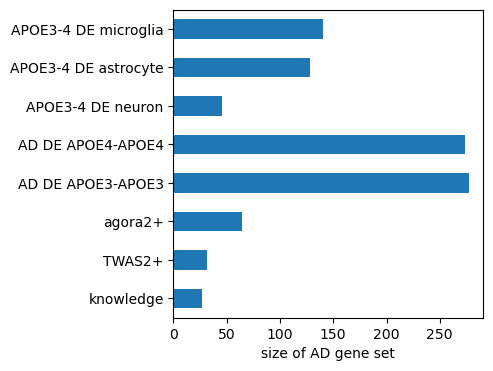

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
gsets.symbol.apply(len).plot(kind='barh', ax=ax)
ax.set_xlabel('size of AD gene set')
attila_utils.savefig(fig, 'AD-gene-set-size')

In [7]:
gsets.symbol.apply(len)#.to_latex('/Users/jonesa7/Desktop/size.tex')

knowledge                27
TWAS2+                   32
agora2+                  64
AD DE APOE3-APOE3       277
AD DE APOE4-APOE4       274
APOE3-4 DE neuron        46
APOE3-4 DE astrocyte    128
APOE3-4 DE microglia    140
Name: symbol, dtype: int64

Selected top drugs from network proximity based screen

In [8]:
sel_drugs = {'Arundine': 'CHEMBL446452',
            'Chenodiol': 'CHEMBL240597',
            'Cysteamine': 'CHEMBL602',
            'Cysteamine hydrochloride': 'CHEMBL1256137'}

Drug-target network.  Note that Q9NQS5/GPR84, a target of Arundine, is not in the gene-gene network.

In [9]:
fpath = '../../results/2021-10-24-chembl-query/chembl-avg_p_activities-phase_3_4-avg_p_act_5plus.csv'
dtn = pd.read_csv(fpath).groupby('drug_chembl_id').apply(lambda x: x.target_uniprot_ac.to_list())
dtn_sel = dtn.loc[sel_drugs.values()].to_frame('uniprot_ac')
dtn_sel = pd.concat([dtn_sel.index.to_frame(), dtn_sel], axis=1)
dtn_sel = dtn_sel.rename({v: k for k, v in sel_drugs.items()}, axis=0)

def add_id(ID='symbol', remove_not_in_ggn=False):
#Translate uniprot_ac to ID type; possibly remove gene if not in gene-gene network
    def helper(l):
        val = [uniprot2ids.loc[u, ID] for u in l if (not remove_not_in_ggn) or (uniprot2ids.loc[u, 'entrez_id'] in ggn.nodes)]
        return(val)
    return(dtn_sel.uniprot_ac.apply(helper))

dtn_sel['symbol'] = add_id('symbol', remove_not_in_ggn=False)
dtn_sel['entrez_id'] = add_id('entrez_id', remove_not_in_ggn=False)
dtn_sel['symbol_ggn'] = add_id('symbol', remove_not_in_ggn=True)
dtn_sel['entrez_id_ggn'] = add_id('entrez_id', remove_not_in_ggn=True)
dtn_sel

,drug_chembl_id,uniprot_ac,symbol,entrez_id,symbol_ggn,entrez_id_ggn
drug_chembl_id,,,,,,
Arundine,CHEMBL446452,"[P49798, Q9NQS5]","[RGS4, GPR84]","[5999, 53831]",[RGS4],[5999]
Chenodiol,CHEMBL240597,"[P49798, Q12908]","[RGS4, SLC10A2]","[5999, 6555]","[RGS4, SLC10A2]","[5999, 6555]"
Cysteamine,CHEMBL602,"[P08684, P49798]","[CYP3A4, RGS4]","[1576, 5999]","[CYP3A4, RGS4]","[1576, 5999]"
Cysteamine hydrochloride,CHEMBL1256137,"[O75496, P02545, P53350, P54132, Q16236, Q9NUW8]","[GMNN, LMNA, PLK1, BLM, NFE2L2, TDP1]","[51053, 4000, 5347, 641, 4780, 55775]","[GMNN, LMNA, PLK1, BLM, NFE2L2, TDP1]","[51053, 4000, 5347, 641, 4780, 55775]"


## Results

In [10]:
target_id = dtn_sel.loc['Arundine', 'entrez_id_ggn'][0]
def get_shortest_path_lengths_target(gs, target_id):
    d = {symbol: network_utilities.get_shortest_path_length_between(ggn, entrez_id, target_id) for symbol, entrez_id in gsets.loc[gs, 'combined'].items()}
    return(d)

def get_shortest_path_lengths(drug):
    targets = dtn_sel.loc[drug, 'entrez_id_ggn']
    l = [[get_shortest_path_lengths_target(gs, t) for t in targets] for gs in gset_names]
    columns = pd.MultiIndex.from_product([[drug], dtn_sel.loc[drug, 'symbol_ggn']])
    df = pd.DataFrame(l, columns=columns, index=gset_names)
    return(df)

path_lengths = pd.concat([get_shortest_path_lengths(drug) for drug in dtn_sel.index], axis=1)
path_lengths

Arundine  \
                                                                   RGS4   
knowledge             {'A2M': 3, 'ABCA7': 3, 'ADAM10': 3, 'APCS': 3,...   
TWAS2+                {'ABCA7': 3, 'ACE': 3, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 3, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 3, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 4, 'ACER3': 4, 'ACOT7': 3, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 3, 'ATG4B': 3, 'ATN1': 3, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 4, 'ABCG1': 3, 'ACADL': 3, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 3, 'ACTC1': 3, 'ADAM12': 3, 'ADAMTS4'...   

                                                              Chenodiol  \
                                                                   RGS4   
knowledge             {'A2M': 3, 'ABCA7': 3, 'ADAM10': 3, 'APCS': 3,...   
TWAS2+                {'ABCA7': 3, 'ACE': 3, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 3, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 3, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 4, 'ACER3': 4, 'ACOT7': 3, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 3, 'ATG4B': 3, 'ATN1': 3, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 4, 'ABCG1': 3, 'ACADL': 3, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 3, 'ACTC1': 3, 'ADAM12': 3, 'ADAMTS4'...   

                                                                         \
                                                                SLC10A2   
knowledge             {'A2M': 3, 'ABCA7': 2, 'ADAM10': 2, 'APCS': 3,...   
TWAS2+                {'ABCA7': 2, 'ACE': 2, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 2, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 2, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 3, 'ACER3': 3, 'ACOT7': 2, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 2, 'ATG4B': 2, 'ATN1': 2, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 3, 'ABCG1': 2, 'ACADL': 2, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 2, 'ACTC1': 2, 'ADAM12': 3, 'ADAMTS4'...   

                                                             Cysteamine  \
                                                                 CYP3A4   
knowledge             {'A2M': 3, 'ABCA7': 2, 'ADAM10': 2, 'APCS': 2,...   
TWAS2+                {'ABCA7': 2, 'ACE': 2, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 2, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 2, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 3, 'ACER3': 3, 'ACOT7': 2, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 2, 'ATG4B': 2, 'ATN1': 2, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 3, 'ABCG1': 2, 'ACADL': 2, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 2, 'ACTC1': 2, 'ADAM12': 3, 'ADAMTS4'...   

                                                                         \
                                                                   RGS4   
knowledge             {'A2M': 3, 'ABCA7': 3, 'ADAM10': 3, 'APCS': 3,...   
TWAS2+                {'ABCA7': 3, 'ACE': 3, 'APOC1': 3, 'APOC2': 3,...   
agora2+               {'ACE': 3, 'AP2B1': 2, 'ATP1B1': 2, 'ATP2A2': ...   
AD DE APOE3-APOE3     {'AAK1': 3, 'ADD3': 3, 'AEBP1': 3, 'AGO2': 2, ...   
AD DE APOE4-APOE4     {'ABCC12': 4, 'ACER3': 4, 'ACOT7': 3, 'ADCYAP1...   
APOE3-4 DE neuron     {'ARNTL2': 3, 'ATG4B': 3, 'ATN1': 3, 'BNC2': 3...   
APOE3-4 DE astrocyte  {'ABCA5': 4, 'ABCG1': 3, 'ACADL': 3, 'ADAM12':...   
APOE3-4 DE microglia  {'ACP5': 3, 'ACTC1': 3, 'ADAM12': 3, 'ADAMTS4'...   

                                               Cysteamine hydrochloride  \
                                                                   GMNN   
knowledge             {'A2M': 2, 'ABCA7': 2, 'ADAM10': 2, 'APCS': 3,...   
TWAS2+                {'ABCA7': 2, 'ACE': 2, 'APOC1': 3, 'APOC2': 3,...   
agora2+ 

In [11]:
path_lengths_targ = path_lengths.drop([('Chenodiol', 'RGS4'), ('Cysteamine', 'RGS4')], axis=1).droplevel(0, axis=1)

In [12]:
dtn_dict = dtn_sel.drop('Cysteamine hydrochloride').symbol_ggn.to_dict()
path_lengths_targ_noHCl = path_lengths_targ.loc[:, np.unique(list(itertools.chain(*list(dtn_dict.values()))))]
path_lengths_targ_noHCl = path_lengths_targ_noHCl.reindex(['RGS4', 'SLC10A2', 'CYP3A4'], axis=1)

In [13]:
def at_shortest_path_length(pathlen, df=path_lengths_targ):
    df = df.applymap(lambda d: '; '.join([k for k, v in d.items() if v == pathlen]))
    df = df.applymap(lambda x: x if len(x) > 0 else np.nan)
    df = df.dropna(how='all')
    df['shortest path length'] = pathlen
    return(df)

nearbyADgenes = pd.concat([at_shortest_path_length(plen, path_lengths_targ_noHCl) for plen in range(2)], axis=0)
nearbyADgenes = nearbyADgenes.dropna(axis=1).rename_axis('AD gene set')
nearbyADgenes = nearbyADgenes.rename({'RGS4': 'interacting AD gene'}, axis=1)
nearbyADgenes['target'] = 'RGS4'
nearbyADgenes = nearbyADgenes.reindex(['target', 'interacting AD gene', 'shortest path length'], axis=1)
nearbyADgenes.to_latex('../../results/2022-09-26-selected-drugs/nearest-ADgenes.tex')
nearbyADgenes

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/3433721590.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda d: '; '.join([k for k, v in d.items() if v == pathlen]))
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/3433721590.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x if len(x) > 0 else np.nan)
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/3433721590.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda d: '; '.join([k for k, v in d.items() if v == pathlen]))
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/3433721590.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x if len(x) > 0 else np.nan)


,target,interacting AD gene,shortest path length
AD gene set,,,
AD DE APOE3-APOE3,RGS4,RGS4,0
AD DE APOE4-APOE4,RGS4,RGS4,0
agora2+,RGS4,ERBB3,1
AD DE APOE3-APOE3,RGS4,GNAI2,1
AD DE APOE4-APOE4,RGS4,CALM1; GNAI2,1
APOE3-4 DE neuron,RGS4,PLCB1,1


Shortest path lengths from each target to any AD gene for each AD gene sets

In [14]:
path_lengths_targ.applymap(lambda d: min(d.values()))

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2740928448.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  path_lengths_targ.applymap(lambda d: min(d.values()))


,RGS4,SLC10A2,CYP3A4,GMNN,LMNA,PLK1,BLM,NFE2L2,TDP1
knowledge,2,2,2,2,2,1,1,1,2
TWAS2+,2,2,2,2,2,2,2,2,2
agora2+,1,2,2,2,2,1,2,2,2
AD DE APOE3-APOE3,0,2,2,2,1,1,1,1,2
AD DE APOE4-APOE4,0,2,2,2,1,1,1,1,2
APOE3-4 DE neuron,1,2,2,2,2,1,2,2,2
APOE3-4 DE astrocyte,2,2,2,1,1,0,2,2,2
APOE3-4 DE microglia,2,2,2,1,1,1,1,1,2


Shortest path lengths from each target to any AD gene across all AD gene sets

In [15]:
path_lengths_targ.applymap(lambda d: min(d.values())).min()

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2487476068.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  path_lengths_targ.applymap(lambda d: min(d.values())).min()


RGS4       0
SLC10A2    2
CYP3A4     2
GMNN       1
LMNA       1
PLK1       0
BLM        1
NFE2L2     1
TDP1       2
dtype: int64

Shortest path lengths from each target to the most distant AD gene for each AD gene sets

In [16]:
path_lengths_targ.applymap(lambda d: max(d.values()))

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/388855355.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  path_lengths_targ.applymap(lambda d: max(d.values()))


,RGS4,SLC10A2,CYP3A4,GMNN,LMNA,PLK1,BLM,NFE2L2,TDP1
knowledge,4,4,4,4,4,4,4,4,5
TWAS2+,4,4,4,4,3,4,4,3,4
agora2+,4,3,3,3,3,3,3,3,4
AD DE APOE3-APOE3,4,4,4,4,4,4,4,4,4
AD DE APOE4-APOE4,4,4,4,4,4,4,4,4,4
APOE3-4 DE neuron,4,3,3,3,3,3,3,3,4
APOE3-4 DE astrocyte,5,4,4,4,4,4,4,4,5
APOE3-4 DE microglia,4,4,4,4,4,4,4,4,5


Histograms of the shortest path lengths for each target combined with any AD gene.

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2146350295.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  s = df.applymap(lambda x: list(x.values())).sum()


['named-figure/shortest-path-lengths-hist.png',
 'named-figure/shortest-path-lengths-hist.pdf']

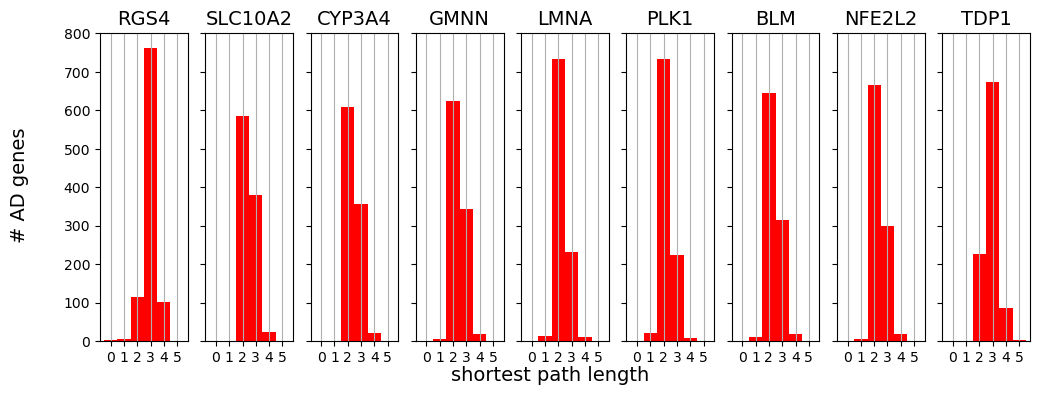

In [17]:
def shortest_path_length_hist(df=path_lengths_targ):
    s = df.applymap(lambda x: list(x.values())).sum()
    fig, ax = plt.subplots(1, len(s), sharey=True, figsize=(12, 4))
    for axi, lengths, target in zip(ax, s, s.index):
        axi.hist(lengths, bins=np.arange(7)-0.5, color='red')
        axi.set_xticks(range(6))
        axi.set_xticklabels(range(6))
        axi.set_title(target, fontsize=14)
        axi.grid(axis='x')
    fig.supxlabel('shortest path length', y=0.0, fontsize=14)
    fig.supylabel('# AD genes', x=0.05, fontsize=14)
    return((fig, ax))

fig, ax = shortest_path_length_hist(df=path_lengths_targ)
attila_utils.savefig(fig, 'shortest-path-lengths-hist')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2146350295.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  s = df.applymap(lambda x: list(x.values())).sum()


['named-figure/shortest-path-lengths-hist_noHCl.png',
 'named-figure/shortest-path-lengths-hist_noHCl.pdf']

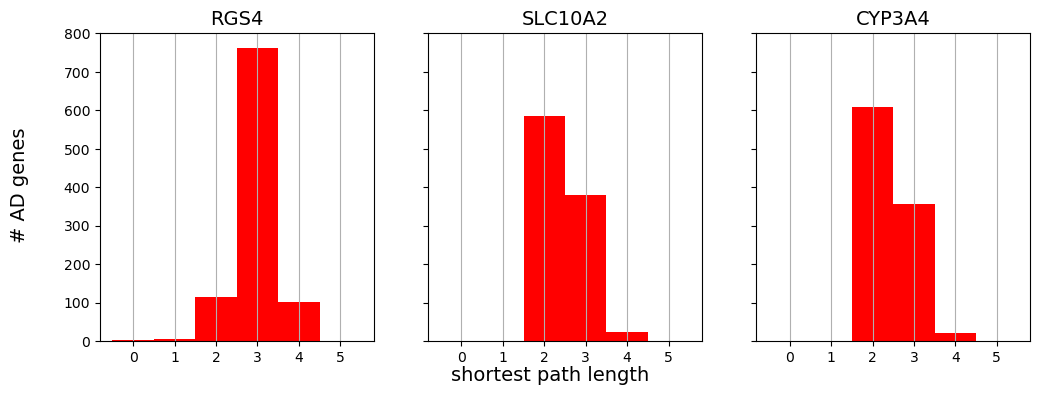

In [18]:
fig, ax = shortest_path_length_hist(df=path_lengths_targ_noHCl)
attila_utils.savefig(fig, 'shortest-path-lengths-hist_noHCl')

Histograms of the shortest path lengths for each (target $\times$ AD gene set) combination.

['named-figure/shortest-path-lengths-gsets-hist.png',
 'named-figure/shortest-path-lengths-gsets-hist.pdf']

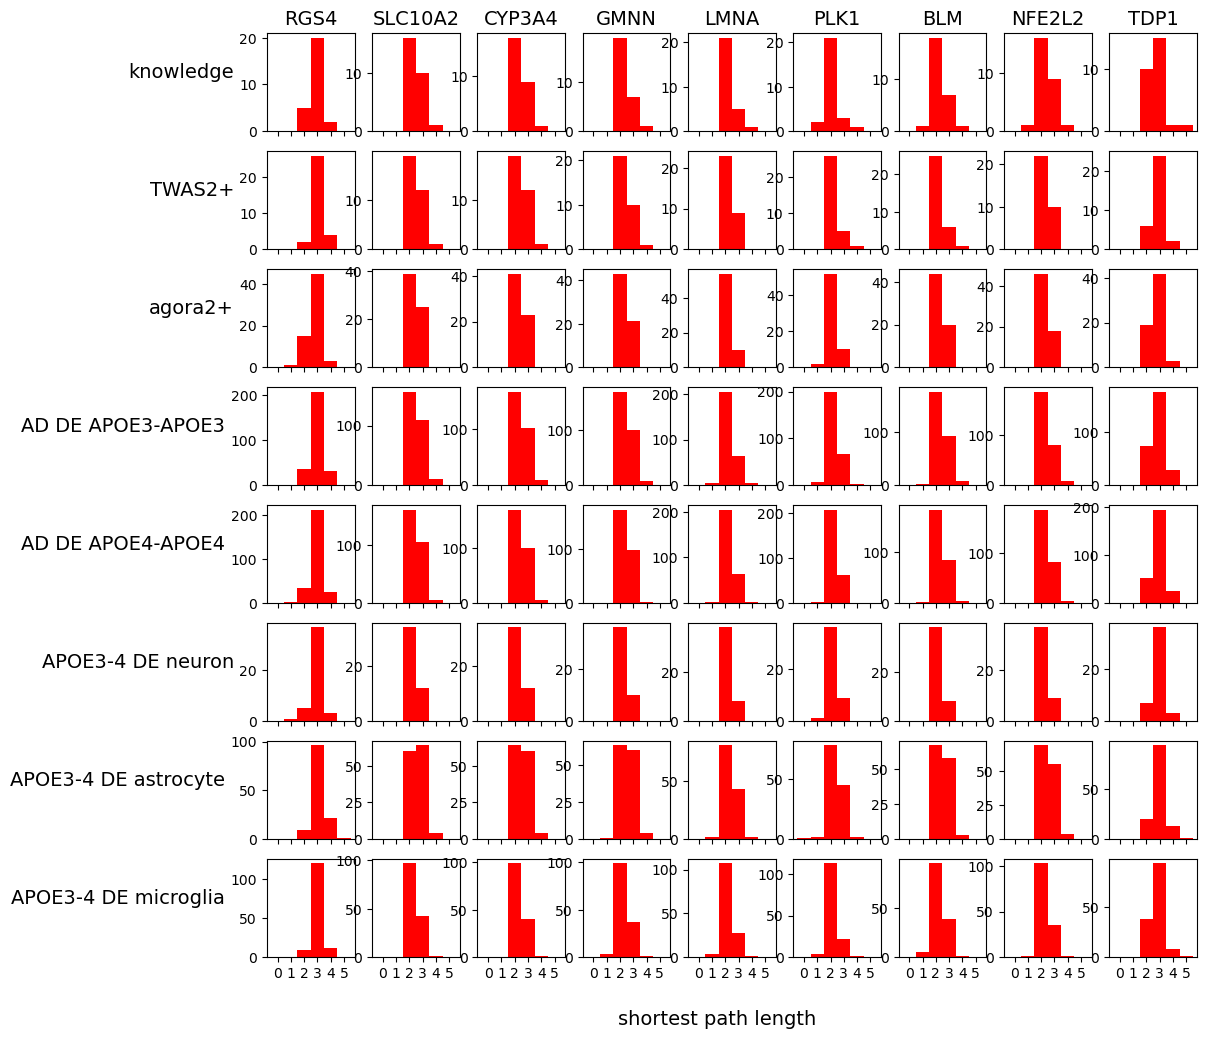

In [19]:
def shortest_path_length_gsets_hist(df=path_lengths_targ):
    fig, ax = plt.subplots(*df.shape, sharex=True, sharey=False, figsize=(12, 12))
    #fig, ax = plt.subplots(*df.shape, sharex=False, sharey=True, figsize=np.array(df.shape) * 1.5)
    for i, gset in enumerate(df.index):
        for j, target in enumerate(df.columns):
            axi = ax[i, j]
            axi.hist(df.loc[gset, target].values(), bins=np.arange(7)-0.5, color='red')
            axi.set_xticks(range(6))
            axi.set_xticklabels(range(6))
            if j == 0:
                axi.set_ylabel(gset, rotation=0, horizontalalignment='right', fontsize=14)
            if i == 0:
                axi.set_title(target, fontsize=14)
    fig.supxlabel('shortest path length', y=0.05, fontsize=14)
    return((fig, ax))
    
fig, ax = shortest_path_length_gsets_hist(df=path_lengths_targ)
attila_utils.savefig(fig, 'shortest-path-lengths-gsets-hist')

['named-figure/shortest-path-lengths-gsets-hist_noHCl.png',
 'named-figure/shortest-path-lengths-gsets-hist_noHCl.pdf']

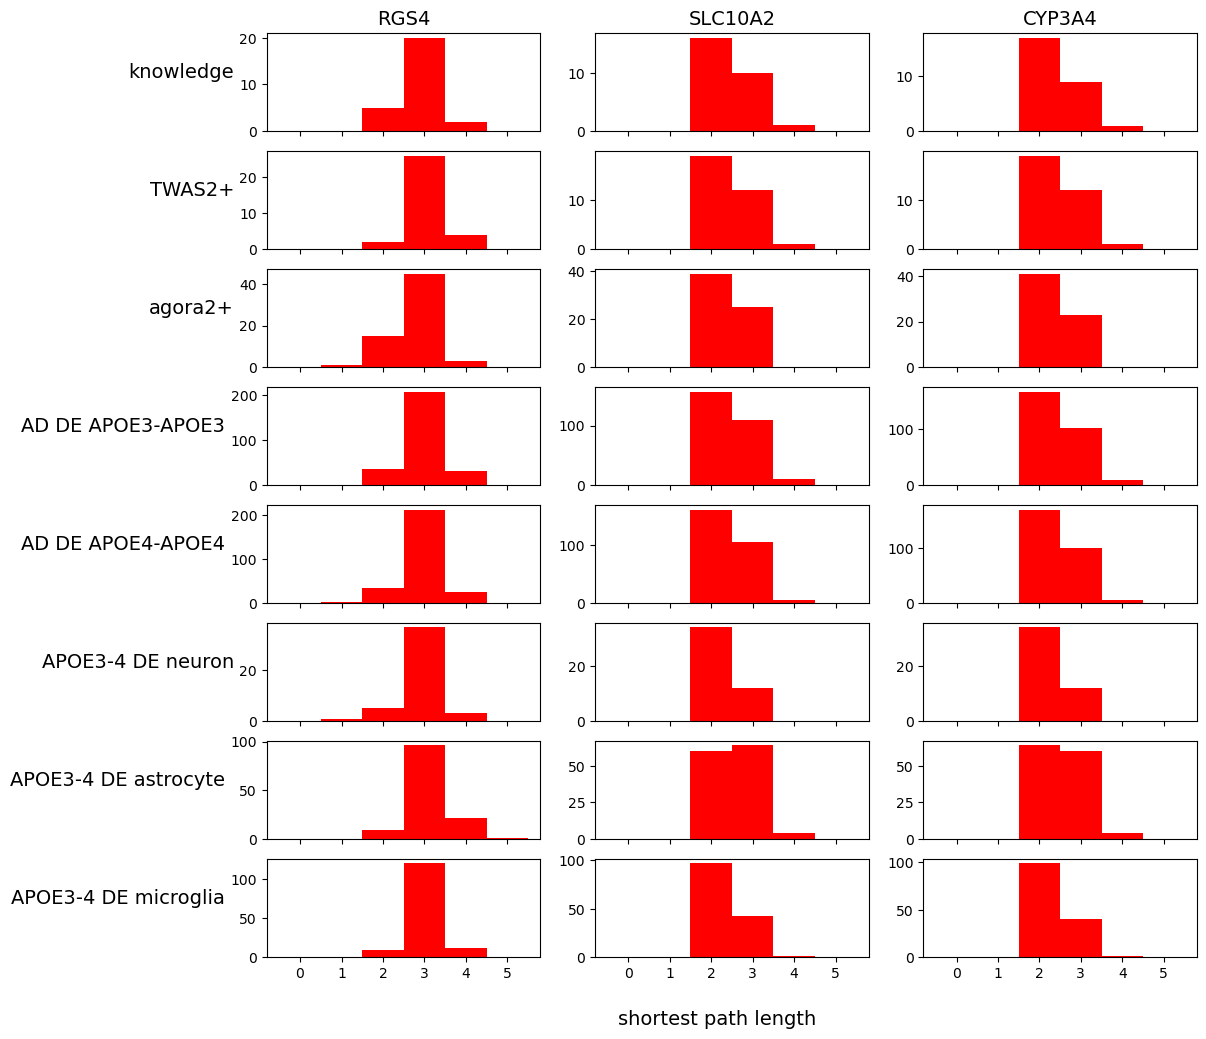

In [20]:
fig, ax = shortest_path_length_gsets_hist(df=path_lengths_targ_noHCl)
attila_utils.savefig(fig, 'shortest-path-lengths-gsets-hist_noHCl')

Detailed plots of the shortest path lengths for each (target $\times$ AD gene) combination.

In [21]:
def path_table1(gset, target, plen_df=path_lengths_targ_noHCl, gsets=gsets):
    pathlen = plen_df.loc[gset, target].values()
    data = pd.DataFrame({'AD gene set': gset, 'target': target, 'AD gene': gsets.loc[gset, 'symbol'], 'path length': pathlen})
    data = data.sort_values(['path length', 'AD gene'])
    return(data)

def path_table(plen_df=path_lengths_targ_noHCl, gsets=gsets):
    ll = [[path_table1(gset, target, plen_df=plen_df, gsets=gsets) for target in plen_df.columns] for gset in plen_df.index]
    val = pd.concat(itertools.chain(*ll), axis=0)
    return(val)

path_table(path_lengths_targ_noHCl).to_csv('../../results/2022-09-26-selected-drugs/all-path-lengths_noHCl.csv', index=False)
path_table(path_lengths_targ_noHCl)

,AD gene set,target,AD gene,path length
5,knowledge,RGS4,APP,2
10,knowledge,RGS4,DBN1,2
15,knowledge,RGS4,MAPT,2
18,knowledge,RGS4,PPP5C,2
23,knowledge,RGS4,SNCA,2
...,...,...,...,...
131,APOE3-4 DE microglia,CYP3A4,TRAM2,3
134,APOE3-4 DE microglia,CYP3A4,UGGT2,3
137,APOE3-4 DE microglia,CYP3A4,ZNF582,3
139,APOE3-4 DE microglia,CYP3A4,ZNF827,3


In [22]:
path_table(path_lengths_targ).to_csv('../../results/2022-09-26-selected-drugs/all-path-lengths.csv', index=False)

In [23]:
def path_barh(gset='knowledge', plen_df=path_lengths_targ, gsets=gsets):
    fig, ax = plt.subplots(1, len(plen_df.columns), figsize=(16, 5 * len(gsets.loc[gset, 'symbol']) / 25))
    y = np.arange(start=len(gsets.loc[gset, 'symbol']), stop=0, step=-1) - 1
    df = plen_df
    for axi, target in zip(ax, df.columns):
        pathlen = df.loc[gset, target].values()
        data = pd.DataFrame({'symbol': gsets.loc[gset, 'symbol'], 'path length': pathlen})
        data = data.sort_values(['path length', 'symbol'])
        data['y'] = np.arange(start=len(gsets.loc[gset, 'symbol']), stop=0, step=-1) - 1
        axi.barh(y='y', width='path length', data=data)
        axi.set_yticks(data['y'])
        axi.set_yticklabels(data.symbol)
        axi.grid(axis='x')
        axi.set_title(target)
        axi.set_xticks(range(6))
    fig.tight_layout(pad=1)
    fontsize=14
    fig.supylabel(gset + ' based AD genes', fontsize=fontsize, x=-0.02)
    fig.suptitle('Shortest path lengths from drug targets to ' + gset + ' based AD genes' , y=1.05, fontsize=fontsize)
    return((fig, ax))

def multi_path_barh(gset_names, noHCl=True):
    plen_df = path_lengths_targ_noHCl if noHCl else path_lengths_targ
    for gset in gset_names:
        fig, ax = path_barh(gset=gset, plen_df=plen_df)
        suffix = '_noHCl' if noHCl else ''
        fpath = 'shortest-path-lengths-barh' + suffix + '-' + gset
        attila_utils.savefig(fig, fpath)

if False:
    multi_path_barh(gset_names, noHCl=False)

In [24]:
if False:
    multi_path_barh(gset_names, noHCl=True)

In [25]:
g = network_utilities.get_subgraph(ggn, gsets.loc['knowledge', 'entrez_id'])
#id_mapper = dict(zip(gsets.loc['knowledge', 'entrez_id'], gsets.loc['knowledge', 'symbol']))
id_mapper = entrez2ids.symbol.to_dict()
repos_tools.output_network_in_sif(g, '/Users/jonesa7/Desktop/knowledge.sif', id_mapper=id_mapper)

## Extending gene sets with targets and genes on shortest paths

In [26]:
def extend_gset(gset, target, pathl=path_lengths_targ, ggn=ggn):
    d = pathl.loc[gset, target]
    nearbyADgenes = [symbol2ids.loc[k, 'entrez_id'] for k, v in d.items() if v == min(d.values())]
    get_paths = network_utilities.get_all_shortest_paths_between
    l = [get_paths(ggn, symbol2ids.loc[target, 'entrez_id'], ADgene) for ADgene in nearbyADgenes]
    l = list(itertools.chain(*l))
    return(l)

def extend_gset_multitarg(gset, dtn_sel=dtn_sel, pathl=path_lengths_targ, ggn=ggn):
    dtn_dict = dtn_sel.symbol_ggn.to_dict()
    targets = set(itertools.chain(*dtn_dict.values()))
    lll = [extend_gset(gset, target, pathl=path_lengths_targ, ggn=ggn) for target in targets]
    ll = [list(itertools.chain(*x)) for x in lll]
    path_genes = set(itertools.chain(*ll))
    gset_set = gsets.loc[gset, 'entrez_id']
    all_genes = path_genes.union(gset_set)
    return(all_genes)

def extend_gsets(gset_names, dtn_sel=dtn_sel, pathl=path_lengths_targ, ggn=ggn):
    dtn_dict_id = dtn_sel.entrez_id_ggn.to_dict()
    l = [extend_gset_multitarg(gset, dtn_sel=dtn_sel, pathl=pathl, ggn=ggn) for gset in gset_names]
    AD_genes = functools.reduce(lambda a, b: a.union(b), l)
    G = ggn.subgraph(AD_genes).copy()
    def dict2tuples(k, v):
        val = list(zip([k] * len(v), v))
        return(val)
    l = [dict2tuples(k, v) for k, v in dtn_dict_id.items()]
    dtn_edges = list(itertools.chain(*l))
    G.add_nodes_from(dtn_dict.keys())
    G.add_edges_from(dtn_edges)
    return(G)

def membership_table(gset_names, G, sep='|', dtn_sel=dtn_sel, gsets=gsets, entrez2ids=entrez2ids):
    gsets = gsets.loc[gset_names]
    AD_genes = set(itertools.chain(*gsets.loc[:, 'symbol'].to_list()))
    def get_memberships(gene):
        s = gsets.symbol.apply(lambda x: gene in x)
        l = s.loc[s].index.to_list()
        val = sep.join(l)
        return(val)
    s = pd.Series([get_memberships(gene) for gene in AD_genes], index=AD_genes)
    df1 = s.rename_axis('gene').to_frame('gene set')
    genes = set(G.nodes).difference(dtn_sel.index)
    genes = set(entrez2ids.loc[genes, 'symbol'].to_list())
    path_genes = genes.difference(AD_genes)
    df2 = pd.DataFrame({'gene set': 'mediator'}, index=path_genes).rename_axis('gene')
    df3 = pd.DataFrame({'gene set': 'drug'}, index=dtn_sel.index).rename_axis('gene')
    df = pd.concat([df1, df2, df3], axis=0)
    return(df)

In [27]:
def shortest_paths2df(shortest_paths, categories=['RGS4', 'SLC10A2', 'CYP3A4']):
    def helper(gset):
        #l = [path for path in shortest_paths[gset].values() if len(path) == 3]
        ll = list(itertools.chain(*shortest_paths[gset].values()))
        a = np.array([path for path in ll if len(path) == 3])
        df = pd.DataFrame(a, columns=['target', 'mediator', 'AD gene'])
        df['AD gene set'] = gset
        return(df)
    l = [helper(gset) for gset in shortest_paths.keys()]
    val = pd.concat(l, axis=0)
    val['target'] = pd.Categorical(val.target, categories=categories, ordered=True)
    return(val)

def write4cytoscape(sel_gsets=['knowledge'], dropCysHCl=True, dtn_sel=dtn_sel, id_mapper=id_mapper, categories=['RGS4', 'SLC10A2', 'CYP3A4']):
    dtn_sel = dtn_sel.drop('Cysteamine hydrochloride', axis=0) if dropCysHCl else dtn_sel
    G_sel = extend_gsets(sel_gsets, dtn_sel=dtn_sel)
    suffix = '' if dropCysHCl else '-CysHCl'
    path_bn = '../../results/2022-09-26-selected-drugs/' + '-'.join(sel_gsets)
    sif_path = path_bn + '-dtn' + suffix + '.sif'
    membership_path = path_bn + '-membership' + suffix + '.csv'
    shortestp_path = path_bn + '-shortest_paths' + suffix + '.csv'
    repos_tools.output_network_in_sif(G_sel, sif_path, id_mapper=id_mapper)
    membership = membership_table(sel_gsets, G_sel, dtn_sel=dtn_sel)
    membership.to_csv(membership_path)
    targets = set(itertools.chain(*dtn_sel.symbol_ggn.to_list()))
    shortest_paths = {gset: {target: [[entrez2ids.loc[x, 'symbol'] for x in l] for l in extend_gset(gset, target)] for target in targets} for gset in sel_gsets}
    shortest_paths = shortest_paths2df(shortest_paths, categories=categories)
    shortest_paths.to_csv(shortestp_path, index=False)
    val = {'G_sel': G_sel, 'membership': membership, 'shortest_paths': shortest_paths}
    return(val)

## Shortest paths

### Separate sets: knowledge, TWAS2+, ...

In [28]:
if not os.path.exists('../../results/2022-09-26-selected-drugs/AD DE APOE3-APOE3-membership.csv'):
    cytos = {gset: write4cytoscape(sel_gsets=[gset], dropCysHCl=True, dtn_sel=dtn_sel, id_mapper=id_mapper) for gset in gsets.index}
    shortest_paths = pd.concat([cytos[gset]['shortest_paths'] for gset in gsets.index], axis=0)
else:
    l = [pd.read_csv('../../results/2022-09-26-selected-drugs/' + gset + '-shortest_paths.csv') for gset in gsets.index]
    shortest_paths = pd.concat(l, axis=0)

shortest_paths['target'] = pd.Categorical(shortest_paths['target'], categories=['RGS4', 'SLC10A2', 'CYP3A4'], ordered=True)
#shortest_paths.groupby('target').mediator.value_counts()

### Aggregated sets: knowledge $\cup$ TWAS2+ and knowledge $\cup$ TWAS2+ $\cup$ agora2+

In [29]:
if not os.path.exists('../../results/2022-09-26-selected-drugs/knowledge-TWAS2+-agora2+-membership.csv'):
    ll = [['knowledge', 'TWAS2+'], ['knowledge', 'TWAS2+', 'agora2+']]
    cytos1 = {'-'.join(l): write4cytoscape(sel_gsets=l, dropCysHCl=True, dtn_sel=dtn_sel, id_mapper=id_mapper) for l in ll}
    shortest_paths1 = cytos1['knowledge-TWAS2+-agora2+']['shortest_paths']
else:
    shortest_paths1 = pd.read_csv('../../results/2022-09-26-selected-drugs/knowledge-TWAS2+-agora2+-shortest_paths.csv')

shortest_paths1['target'] = pd.Categorical(shortest_paths1['target'], categories=['RGS4', 'SLC10A2', 'CYP3A4'], ordered=True)

In [30]:
def get_mediator_counts(spaths=shortest_paths, with_categories=False):
    spaths = spaths if with_categories else spaths.astype({'target': 'object'})
    val = spaths.groupby('target').mediator.value_counts()
    return(val)

### Checking consistency between separate sets and aggregate sets approach

We see below that the two approaches are consistent

In [31]:
get_mediator_counts(shortest_paths.loc[shortest_paths['AD gene set'].isin(['knowledge', 'TWAS2+', 'agora2+'])], with_categories=True)

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2241120029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  val = spaths.groupby('target').mediator.value_counts()


target   mediator
RGS4     EGFR         6
         CALM1        3
         GNAO1        1
         COPB1        1
         ERBB3        1
         AMFR         0
         STUB1        0
         GK           0
         PRKACA       0
         PRKCA        0
         UBC          0
SLC10A2  UBC         74
         GK           0
         ERBB3        0
         EGFR         0
         COPB1        0
         CALM1        0
         AMFR         0
         GNAO1        0
         PRKCA        0
         STUB1        0
         PRKACA       0
CYP3A4   UBC         74
         PRKACA      11
         PRKCA        8
         STUB1        7
         AMFR         1
         GK           1
         COPB1        0
         CALM1        0
         GNAO1        0
         EGFR         0
         ERBB3        0
Name: count, dtype: int64

In [32]:
get_mediator_counts(shortest_paths1, with_categories=True)

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2241120029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  val = spaths.groupby('target').mediator.value_counts()


target   mediator
RGS4     EGFR         6
         CALM1        3
         GNAO1        1
         COPB1        1
         ERBB3        1
         AMFR         0
         STUB1        0
         GK           0
         PRKACA       0
         PRKCA        0
         UBC          0
SLC10A2  UBC         74
         GK           0
         ERBB3        0
         EGFR         0
         COPB1        0
         CALM1        0
         AMFR         0
         GNAO1        0
         PRKCA        0
         STUB1        0
         PRKACA       0
CYP3A4   UBC         74
         PRKACA      11
         PRKCA        8
         STUB1        7
         AMFR         1
         GK           1
         COPB1        0
         CALM1        0
         GNAO1        0
         EGFR         0
         ERBB3        0
Name: count, dtype: int64

In [33]:
l = [get_mediator_counts(shortest_paths.loc[shortest_paths['AD gene set'] == gset]) for gset in gsets.index]
mediator_counts_gset = pd.concat(l, axis=1)#.astype('int64')
mediator_counts_gset.columns = gsets.index
mediator_counts_gset = mediator_counts_gset.fillna(0).astype('int64')
mediator_counts_gset = mediator_counts_gset.reindex(get_mediator_counts(shortest_paths, with_categories=True).index)
mediator_counts_gset

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2241120029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  val = spaths.groupby('target').mediator.value_counts()


knowledge  TWAS2+  agora2+  AD DE APOE3-APOE3  \
target  mediator                                                  
RGS4    EGFR            4.0     2.0      0.0                0.0   
        CALM1           3.0     0.0      0.0                0.0   
        GNAO1           1.0     0.0      0.0                0.0   
        GNAI1           0.0     0.0      0.0                0.0   
        ERBB3           0.0     1.0      0.0                0.0   
        GNAQ            0.0     0.0      0.0                0.0   
        GNAI2           0.0     0.0      0.0                0.0   
        COPB1           1.0     0.0      0.0                0.0   
        PRKCA           NaN     NaN      NaN                NaN   
        AMFR            NaN     NaN      NaN                NaN   
        PRKACA          NaN     NaN      NaN                NaN   
        GK              NaN     NaN      NaN                NaN   
        CYB5A           NaN     NaN      NaN                NaN   
        STUB1           NaN     NaN      NaN                NaN   
        UBC             NaN     NaN      NaN                NaN   
SLC10A2 UBC            16.0    19.0     39.0              157.0   
        AMFR            NaN     NaN      NaN                NaN   
        CALM1           NaN     NaN      NaN                NaN   
        COPB1           NaN     NaN      NaN                NaN   
        CYB5A           NaN     NaN      NaN                NaN   
        EGFR            NaN     NaN      NaN                NaN   
        ERBB3           NaN     NaN      NaN                NaN   
        STUB1           NaN     NaN      NaN                NaN   
        PRKCA           NaN     NaN      NaN                NaN   
        PRKACA          NaN     NaN      NaN                NaN   
        GNAQ            NaN     NaN      NaN                NaN   
        GNAO1           NaN     NaN      NaN                NaN   
        GNAI2           NaN     NaN      NaN                NaN   
        GNAI1           NaN     NaN      NaN                NaN   
        GK              NaN     NaN      NaN                NaN   
CYP3A4  UBC            16.0    19.0     39.0              157.0   
        PRKACA          4.0     1.0      6.0               16.0   
        PRKCA           4.0     0.0      4.0               15.0   
        STUB1           3.0     2.0      2.0                5.0   
        AMFR            0.0     0.0      1.0                2.0   
        GK              1.0     0.0      0.0                0.0   
        CYB5A           0.0     0.0      0.0                0.0   
        ERBB3           NaN     NaN      NaN                NaN   
        EGFR            NaN     NaN      NaN                NaN   
        CALM1           NaN     NaN      NaN                NaN   
        COPB1           NaN     NaN      NaN                NaN   
        GNAQ            NaN     NaN      NaN                NaN   
        GNAO1           NaN     NaN      NaN                NaN   
        GNAI2           NaN     NaN      NaN                NaN   
        GNAI1           NaN     NaN      NaN                NaN   

                  AD DE APOE4-APOE4  APOE3-4 DE neuron  APOE3-4 DE astrocyte  \
target  mediator                                                               
RGS4    EGFR                    0.0                0.0                   8.0   
        CALM1                   0.0                0.0                   0.0   
        GNAO1                   0.0                0.0                   1.0   
        GNAI1                   0.0                0.0                   1.0   
        ERBB3                   0.0                0.0                   1.0   
        GNAQ                    0.0                0.0                   2.0   
        GNAI2                   0.0                0.0                   1.0   
        COPB1                   0.0                0.0                   0.0   
        PRKCA                   NaN                NaN              

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/1262866249.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nrows = len(data.groupby('target'))
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/1262866249.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nmediators = data.groupby('target').apply(len)


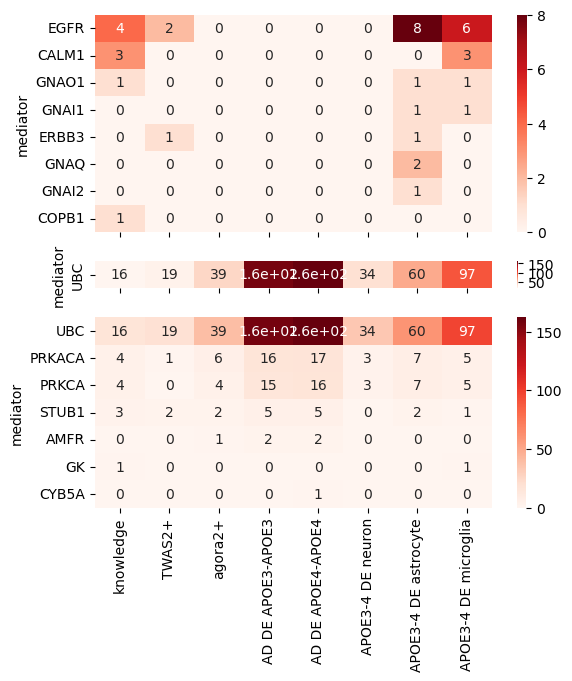

In [34]:
def my_heatmap(mediator_counts_gset=mediator_counts_gset):
    data = mediator_counts_gset.dropna()
    nrows = len(data.groupby('target'))
    nmediators = data.groupby('target').apply(len)
    targets = nmediators.index
    gs = GridSpec(nrows, 1, height_ratios=nmediators.to_list())
    fig = plt.figure(figsize=(6.4, 6.4))
    for i, target in enumerate(targets):
        df = data.xs(target, level=0, axis=0)
        #df = df.map(lambda x: None if x == 0 else x)
        ax = fig.add_subplot(gs[i])
        ax = sns.heatmap(df, ax=ax, annot=True, cmap='Reds')
        if i < nrows - 1:
            ax.set_xticklabels('')
    return((fig, ax, df))

fig, ax, df = my_heatmap()

In [35]:
mediator_counts_gset.rename(dict(zip(gsets.index, 'ABCDEFGH')), axis=1)#.to_latex('../../results/2022-09-26-selected-drugs/mediator-counts.tex')

A     B     C      D      E     F     G     H
target  mediator                                                  
RGS4    EGFR       4.0   2.0   0.0    0.0    0.0   0.0   8.0   6.0
        CALM1      3.0   0.0   0.0    0.0    0.0   0.0   0.0   3.0
        GNAO1      1.0   0.0   0.0    0.0    0.0   0.0   1.0   1.0
        GNAI1      0.0   0.0   0.0    0.0    0.0   0.0   1.0   1.0
        ERBB3      0.0   1.0   0.0    0.0    0.0   0.0   1.0   0.0
        GNAQ       0.0   0.0   0.0    0.0    0.0   0.0   2.0   0.0
        GNAI2      0.0   0.0   0.0    0.0    0.0   0.0   1.0   0.0
        COPB1      1.0   0.0   0.0    0.0    0.0   0.0   0.0   0.0
        PRKCA      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        AMFR       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        PRKACA     NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GK         NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        CYB5A      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        STUB1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        UBC        NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
SLC10A2 UBC       16.0  19.0  39.0  157.0  162.0  34.0  60.0  97.0
        AMFR       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        CALM1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        COPB1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        CYB5A      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        EGFR       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        ERBB3      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        STUB1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        PRKCA      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        PRKACA     NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAQ       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAO1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAI2      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAI1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GK         NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
CYP3A4  UBC       16.0  19.0  39.0  157.0  162.0  34.0  60.0  97.0
        PRKACA     4.0   1.0   6.0   16.0   17.0   3.0   7.0   5.0
        PRKCA      4.0   0.0   4.0   15.0   16.0   3.0   7.0   5.0
        STUB1      3.0   2.0   2.0    5.0    5.0   0.0   2.0   1.0
        AMFR       0.0   0.0   1.0    2.0    2.0   0.0   0.0   0.0
        GK         1.0   0.0   0.0    0.0    0.0   0.0   0.0   1.0
        CYB5A      0.0   0.0   0.0    0.0    1.0   0.0   0.0   0.0
        ERBB3      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        EGFR       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        CALM1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        COPB1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAQ       NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAO1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAI2      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN
        GNAI1      NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN

In [36]:
get_mediator_counts(shortest_paths, with_categories=True)

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_50884/2241120029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  val = spaths.groupby('target').mediator.value_counts()


target   mediator
RGS4     EGFR         20
         CALM1         6
         GNAO1         3
         GNAI1         2
         ERBB3         2
         GNAQ          2
         GNAI2         1
         COPB1         1
         PRKCA         0
         AMFR          0
         PRKACA        0
         GK            0
         CYB5A         0
         STUB1         0
         UBC           0
SLC10A2  UBC         584
         AMFR          0
         CALM1         0
         COPB1         0
         CYB5A         0
         EGFR          0
         ERBB3         0
         STUB1         0
         PRKCA         0
         PRKACA        0
         GNAQ          0
         GNAO1         0
         GNAI2         0
         GNAI1         0
         GK            0
CYP3A4   UBC         584
         PRKACA       59
         PRKCA        54
         STUB1        20
         AMFR          5
         GK            2
         CYB5A         1
         ERBB3         0
         EGFR          0
       

In [37]:
%connect_info

{
  "shell_port": 63112,
  "iopub_port": 63113,
  "stdin_port": 63114,
  "control_port": 63116,
  "hb_port": 63115,
  "ip": "127.0.0.1",
  "key": "e5dcffef-a4864e6bb7b141e4c94c1dde",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2022-09-26-selected-drugs/2022-09-26-selected-drugs.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-561ea925-da01-4f80-a88d-29a3cabb64da.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
